In [1]:
import pandas as pd  # data cleaning , data preprocessing etc
import numpy as np # mathematical calculation
import matplotlib.pyplot as plt ## data visualization
import seaborn as sns     ## data visualization

In [2]:
flight = pd.read_excel("Data_Train.xlsx") 
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
flight.shape

(10683, 11)

In [5]:
flight["Additional_Info"].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [6]:
round((8345 / len(flight["Additional_Info"])) * 100 , 2) 

78.11

In [7]:
flight.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
flight.dropna(inplace=True)

In [10]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
flight.shape

(10682, 11)

In [12]:
flight["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [13]:
#df = flight.set_index('Airline' , inplace = False)
#flight = df.drop(["Jet Airways" ,"Jet Airways Business"] )
#flight.shape

In [14]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [15]:
df = flight.set_index('Airline' , inplace = False)
flight = df.drop('Trujet')

In [16]:
flight.reset_index(inplace = True)

In [17]:
flight["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy'], dtype=object)

In [18]:
flight["journey_day"] = pd.to_datetime(flight.Date_of_Journey , format = "%d/%m/%Y").dt.day
flight["journey_month"] = pd.to_datetime(flight.Date_of_Journey , format = "%d/%m/%Y").dt.month

C:\Users\Admin\anaconda3\envs\flight\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\anaconda3\envs\flight\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [20]:
flight.drop("Date_of_Journey" , axis = 1 , inplace = True)

C:\Users\Admin\anaconda3\envs\flight\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
flight.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [22]:
# Extracting hours 
flight["Dep_hour"] = pd.to_datetime(flight.Dep_Time ).dt.hour
flight["Dep_minutes"] = pd.to_datetime(flight.Dep_Time ).dt.minute

C:\Users\Admin\anaconda3\envs\flight\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\anaconda3\envs\flight\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
flight.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [24]:
flight.drop("Dep_Time" , axis = 1 , inplace = True)

C:\Users\Admin\anaconda3\envs\flight\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
flight.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [26]:
flight["Arrival_hour"] = pd.to_datetime(flight.Arrival_Time ).dt.hour
flight["Arrival_minutes"] = pd.to_datetime(flight.Arrival_Time ).dt.minute

C:\Users\Admin\anaconda3\envs\flight\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\anaconda3\envs\flight\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
flight.drop("Arrival_Time" , axis = 1 , inplace = True)

C:\Users\Admin\anaconda3\envs\flight\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
flight.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [29]:
duration = list(flight["Duration"])
hours = []
minutes = []
for i in duration:
    if " " in i:   
        a , b = i.split(" ")
        hours.append(int(a[0:-1]))
        minutes.append(int(b[0:-1]))
    else:
        hours.append(int(i[0:-1]))
        minutes.append(0)

In [30]:
flight["Duration_hours"] = hours
flight["Duration_minutes"] = minutes

C:\Users\Admin\anaconda3\envs\flight\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\anaconda3\envs\flight\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
flight.drop("Duration" , axis = 1 , inplace = True)

C:\Users\Admin\anaconda3\envs\flight\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [32]:
flight.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [33]:
flight["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Name: Airline, dtype: int64

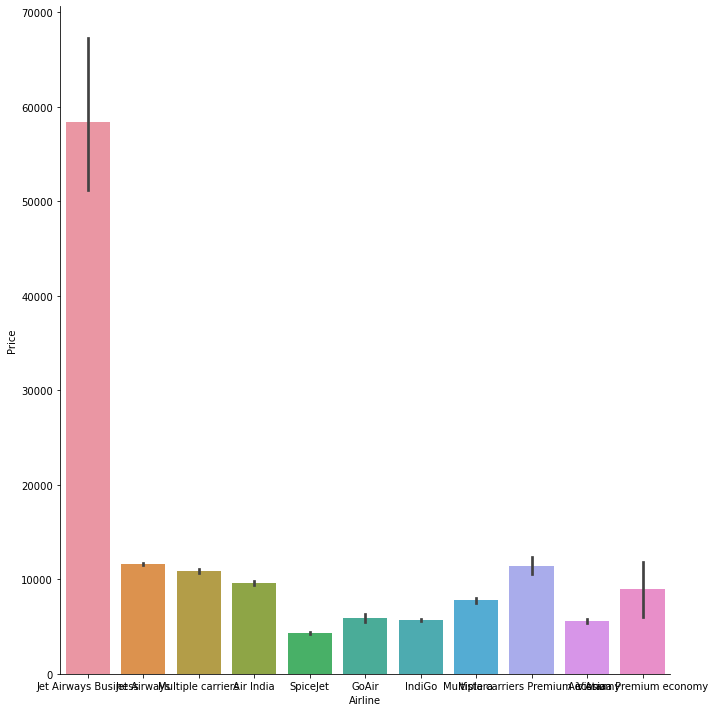

In [34]:
sns.catplot(x="Airline" , y = "Price" , data=flight.sort_values("Price" ,ascending = False ) , kind= "bar" , height=10)

In [35]:
Airline = pd.get_dummies(flight["Airline"] , drop_first=True)
# pd.set_option('display.max_rows', None)
Airline.tail(5)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
10676,0,0,0,0,0,0,0,0,0,0
10677,1,0,0,0,0,0,0,0,0,0
10678,0,0,0,1,0,0,0,0,0,0
10679,0,0,0,0,0,0,0,0,1,0
10680,1,0,0,0,0,0,0,0,0,0


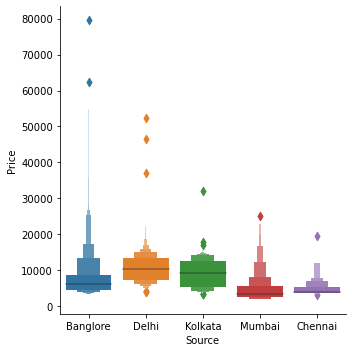

In [36]:
sns.catplot(x="Source" , y = "Price" , data=flight.sort_values("Price" ,ascending = False ) , kind= "boxen")

In [37]:
flight["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

In [38]:
flight["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [39]:
flight["Source"].replace({"Banglore" : "S_Banglore" , "Kolkata" : "S_Kolkata" , "Delhi" : "S_Delhi",
                        "Chennai":"S_Chennai" , "Mumbai" : "S_Mumbai" } , inplace = True)

C:\Users\Admin\anaconda3\envs\flight\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [40]:
Source = flight["Source"]
Source = pd.get_dummies(Source , drop_first=True)
Source.head()

,S_Chennai,S_Delhi,S_Kolkata,S_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


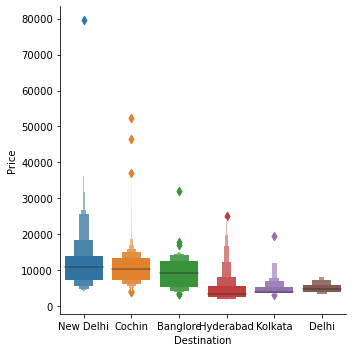

In [41]:
sns.catplot(x="Destination" , y = "Price" , data=flight.sort_values("Price" ,ascending = False ) , kind= "boxen")

In [42]:
flight["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [43]:
flight["Destination"] = flight["Destination"].replace({"New Delhi" : "D_New_Delhi" , "Banglore" : "D_Banglore", "Cochin" : "D_Cochin",
                             "Kolkata" : "D_Kolkata" , "Delhi" : "D_Delhi" , "Hyderabad" : "D_Hyderabad"} )

C:\Users\Admin\anaconda3\envs\flight\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
Destination = flight["Destination"]
Destination = pd.get_dummies(Destination , drop_first=True)
Destination.head()

,D_Cochin,D_Delhi,D_Hyderabad,D_Kolkata,D_New_Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [45]:
flight["Total_Stops"].value_counts()

1 stop      5624
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

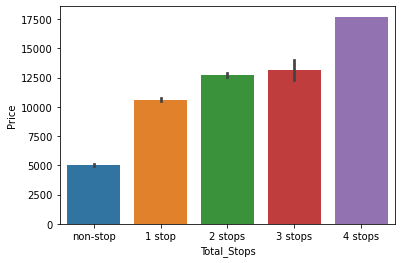

In [46]:
sns.barplot(x = "Total_Stops", y = "Price", data = flight, order = ["non-stop", "1 stop", "2 stops", "3 stops", "4 stops"])

In [47]:
categorical_variable = []
for feature in flight.columns:
    if flight[feature].dtypes == 'O':
        categorical_variable.append(feature)
print(categorical_variable)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


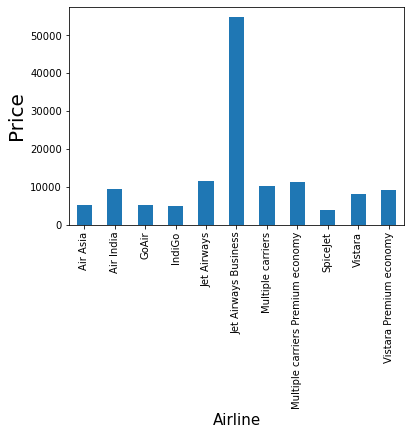

<Figure size 1152x648 with 0 Axes>

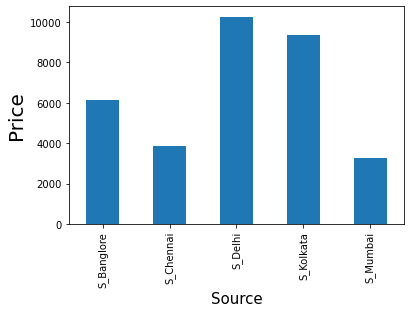

<Figure size 1152x648 with 0 Axes>

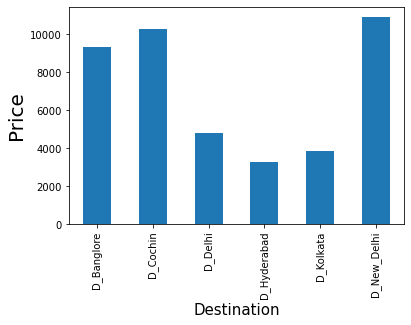

<Figure size 1152x648 with 0 Axes>

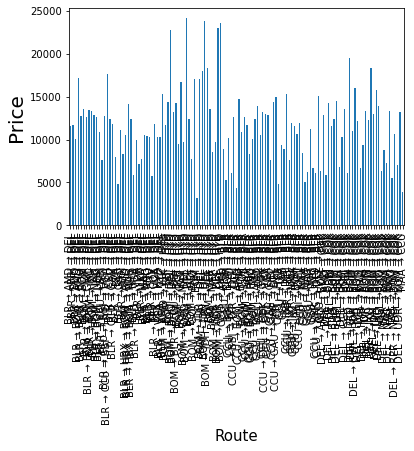

<Figure size 1152x648 with 0 Axes>

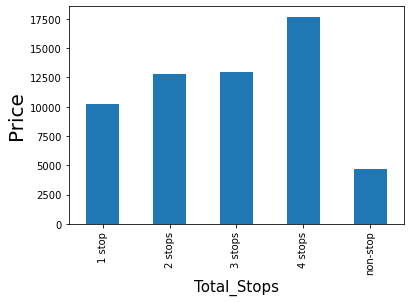

<Figure size 1152x648 with 0 Axes>

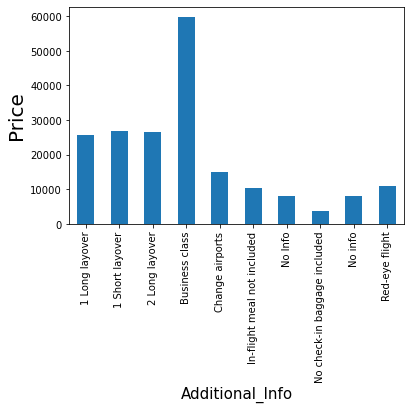

<Figure size 1152x648 with 0 Axes>

In [48]:
for feature in categorical_variable:
    flight.groupby(feature)["Price"].median().plot.bar()
    plt.xlabel(feature , fontsize = 15)
    plt.ylabel("Price" , fontsize = 20)
    plt.figure(figsize=(16, 9))
    plt.show()

In [49]:
flight["Additional_Info"].value_counts()

No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [50]:
flight["Total_Stops"].replace({"non-stop" : 0, "1 stop" : 1, "2 stops" : 2, "3 stops" : 3, "4 stops" : 4}, inplace=True)

C:\Users\Admin\anaconda3\envs\flight\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [51]:
flight.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes
0,IndiGo,S_Banglore,D_New_Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,S_Kolkata,D_Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,S_Delhi,D_Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,S_Kolkata,D_Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,S_Banglore,D_New_Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45


In [52]:
flight.drop(["Route", "Airline", "Destination", "Source", "Additional_Info"], axis = 1, inplace = True)

C:\Users\Admin\anaconda3\envs\flight\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [53]:
flight.head()

,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,0
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45


In [54]:
flight = pd.concat([Airline, Destination, Source, flight], axis = 1)

In [55]:
flight.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,...,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes
0,0,0,1,0,0,0,0,0,0,0,...,0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,2,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,2,13882,9,6,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,...,1,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,1,13302,1,3,16,50,21,35,4,45


In [56]:
pd.set_option('display.max_columns', None)
flight.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,D_Cochin,D_Delhi,D_Hyderabad,D_Kolkata,D_New_Delhi,S_Chennai,S_Delhi,S_Kolkata,S_Mumbai,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2,13882,9,6,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,13302,1,3,16,50,21,35,4,45


# Preprocessing for Test Data

In [57]:
test = pd.read_excel("Test_Set.xlsx")
test.shape

(2671, 10)

In [58]:
test = pd.read_excel("Test_Set.xlsx")
test.dropna(inplace=True) # Dropping all rows with null values

# We are extracting days and month from Date_of_Journey
test["journey_day"] = pd.to_datetime(test.Date_of_Journey , format = "%d/%m/%Y").dt.day 
test["journey_month"] = pd.to_datetime(test.Date_of_Journey , format = "%d/%m/%Y").dt.month

test.drop("Date_of_Journey" , axis = 1 , inplace = True) # Dropping Date_of_Journey because we already extracted days and month

# Extracting departure hours and departure minutes from departure time 
test["Dep_hour"] = pd.to_datetime(test.Dep_Time ).dt.hour
test["Dep_minutes"] = pd.to_datetime(test.Dep_Time ).dt.minute

test.drop("Dep_Time" , axis = 1 , inplace = True) # Dropping Dep_Time as we already extracted hours and minutes from data

# Extracting arrival hours and arrival minutes from arrival time
test["Arrival_hour"] = pd.to_datetime(test.Arrival_Time ).dt.hour
test["Arrival_minutes"] = pd.to_datetime(test.Arrival_Time ).dt.minute

test.drop("Arrival_Time" , axis = 1 , inplace = True) # Dropping Arrival_Time as we already extracted hours and minutes

# Extracting duration hours and minutes from Duration
duration = list(test["Duration"])
hours = []
minutes = []
for i in duration:
    if " " in i:   
        a , b = i.split(" ")
        hours.append(int(a[0:-1]))
        minutes.append(int(b[0:-1]))
    else:
        hours.append(int(i[0:-1]))
        minutes.append(0)
        
test["Duration_hours"] = hours
test["Duration_minutes"] = minutes

test.drop("Duration" , axis = 1 , inplace = True) # Dropping Duration as we already extracted hours and minutes

# Handling Categorical Variables

# Creating dummy variables for Airline | Airline is Nominal variable. 
Airline = test["Airline"]
Airline = pd.get_dummies(Airline , drop_first=True)

# Creating dummy variables for Source | Source is Nominal variable.
test["Source"].replace({"Banglore" : "S_Banglore" , "Kolkata" : "S_Kolkata" , "Delhi" : "S_Delhi",
                        "Chennai":"S_Chennai" , "Mumbai" : "S_Mumbai" } , inplace = True)
Source = test["Source"]
Source = pd.get_dummies(Source , drop_first=True)

# Creating dummy variables for Destination | Destination is Nominal variable. 
test["Destination"].replace({"New Delhi" : "D_New_Delhi" , "Banglore" : "D_Banglore", "Cochin" : "D_Cochin",
                             "Kolkata" : "D_Kolkata" , "Delhi" : "D_Delhi" , "Hyderabad" : "D_Hyderabad"} , inplace = True)
Destination = test["Destination"]
Destination = pd.get_dummies(Destination , drop_first=True)

# Giving ranks to total stops | Total_Stops is Ordinal data. 
test.replace({"non-stop" : 0, "1 stop" : 1, "2 stops" : 2, "3 stops" : 3, "4 stops" : 4}, inplace=True)

# Dropping all previously extracted data variables
# Dropping additional_info because almost 80% of data is missing.
test.drop(["Route", "Airline", "Destination", "Source", "Additional_Info"], axis = 1, inplace = True)

# Concatenating datetime varibales with categorical variables
test = pd.concat([Airline, Destination, Source, test], axis = 1)

In [59]:
test.shape

(2671, 28)

In [60]:
test.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,D_Cochin,D_Delhi,D_Hyderabad,D_Kolkata,D_New_Delhi,S_Chennai,S_Delhi,S_Kolkata,S_Mumbai,Total_Stops,journey_day,journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,6,6,17,30,4,25,10,55
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,12,5,6,20,10,20,4,0
2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,21,5,19,15,19,0,23,45
3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,21,5,8,0,21,0,13,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,24,6,23,55,2,45,2,50


In [61]:
flight.shape # One column is extra which is price [Target Variable]

(10681, 29)

In [62]:
test.shape # One column is less because price is missing which we have to find. 

(2671, 28)

## Splitting Dependent and Independent Variables

In [63]:
x = flight.drop("Price" , axis = 1)
y = flight["Price"]

In [64]:
# x.columns = ["Air_India", "GoAir", "IndiGo", "Jet_Airways", "Jet_Airways_Business",
#        "Multiple_carriers", "Multiple_carriers_Premium_economy", "Spice_jet",
#        "Vistara", "Vistara_Premium_economy", "D_Cochin"," D_Delhi",
#        "D_Hyderabad", "D_Kolkata", "D_New_Delhi", "S_Chennai", "S_Delhi",
#        "S_Kolkata", "S_Mumbai", "Total_stops", "Journey_day", "Journey_month",
#        "Dep_hour", "Dep_minutes", "Arrival_hour", "Arrival_minutes",
#        "Duration_hours", "Duration_minutes"]

In [65]:
x.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'D_Cochin', 'D_Delhi',
       'D_Hyderabad', 'D_Kolkata', 'D_New_Delhi', 'S_Chennai', 'S_Delhi',
       'S_Kolkata', 'S_Mumbai', 'Total_Stops', 'journey_day', 'journey_month',
       'Dep_hour', 'Dep_minutes', 'Arrival_hour', 'Arrival_minutes',
       'Duration_hours', 'Duration_minutes'],
      dtype='object')

## Feature selection 

In [66]:
from sklearn.ensemble import ExtraTreesRegressor
Reg = ExtraTreesRegressor()
Reg.fit(x, y)

ExtraTreesRegressor()

In [67]:
print(Reg.feature_importances_)

[1.01985650e-02 2.08725283e-03 1.77354411e-02 1.47035238e-01
 6.72840277e-02 1.92634052e-02 8.62641509e-04 3.38315471e-03
 5.21506160e-03 9.04219689e-05 9.73796993e-03 1.52559092e-02
 8.20973698e-03 4.85094529e-04 2.47969390e-02 4.91591041e-04
 8.92353609e-03 3.35298929e-03 5.99000501e-03 2.47931242e-01
 1.43934828e-01 5.36002595e-02 2.44103940e-02 2.07383346e-02
 2.76977472e-02 1.86454929e-02 9.38140682e-02 1.88286536e-02]


In [68]:
x.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'D_Cochin', 'D_Delhi',
       'D_Hyderabad', 'D_Kolkata', 'D_New_Delhi', 'S_Chennai', 'S_Delhi',
       'S_Kolkata', 'S_Mumbai', 'Total_Stops', 'journey_day', 'journey_month',
       'Dep_hour', 'Dep_minutes', 'Arrival_hour', 'Arrival_minutes',
       'Duration_hours', 'Duration_minutes'],
      dtype='object')

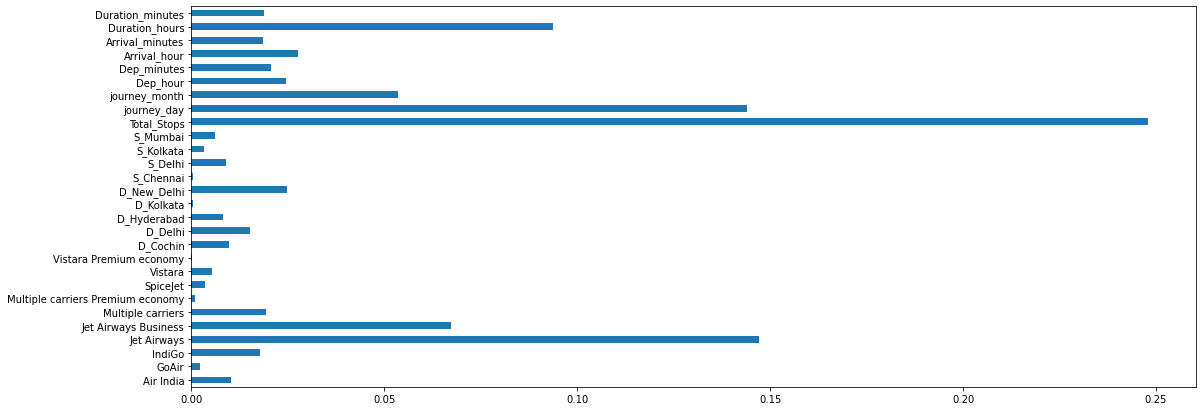

In [69]:
plt.figure(figsize = (18,7))
a = pd.Series(Reg.feature_importances_, index = x.columns)
a.plot.barh()

# Model Building

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [71]:
from sklearn.metrics import mean_squared_error # for calculating mean_squared error
from sklearn.metrics import r2_score # for measering the goodness of best fit line

## Random Forest

In [72]:
from sklearn.ensemble import RandomForestRegressor
Forest = RandomForestRegressor()
Forest.fit(X_train, y_train)

y_pred = Forest.predict(X_test)

score = r2_score(y_test, y_pred)

print(f"accuracy of the model is  {score}")

print('RMSE for Linear Regression < =',np.sqrt(mean_squared_error(y_test,y_pred)))

accuracy of the model is  0.8213728654651057
RMSE for Linear Regression < = 1911.0743899333258


In [73]:
#prediction = Forest.predict(test)

In [74]:
#prediction

In [75]:
import xgboost
xgb_model = xgboost.XGBRegressor()
xgb_model.fit(X_train,y_train)

prediction = xgb_model.predict(X_test)

score = r2_score(y_test,prediction )

print(f"accuracy of the model is  {score}")

print('RMSE for Linear Regression < =',np.sqrt(mean_squared_error(y_test,prediction)))


accuracy of the model is  0.8480044120939942
RMSE for Linear Regression < = 1762.8662675311236


In [76]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgb_model, X = X_train,y = y_train, cv = 10)
print("Cross validation accuracy of random forest model = ", cross_validation)
print("\nCross validation mean accuracy of random forest model = ", cross_validation.mean())

Cross validation accuracy of random forest model =  [0.86788266 0.84116373 0.78546485 0.85362022 0.76986948 0.84424104
 0.84444297 0.84929538 0.87032153 0.83653615]

Cross validation mean accuracy of random forest model =  0.8362838002183363


## Hyperparameter tuning with Random Forest

In [77]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [78]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [79]:
random_search=RandomizedSearchCV(Forest,param_distributions=params,n_iter=5,scoring='r2',n_jobs=-1,cv=5,verbose=3)

## Hyperparameter tuning with XGboost

In [80]:
params = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }


In [81]:
random_search=RandomizedSearchCV(xgb_model,param_distributions=params,n_iter=5,scoring='r2',n_jobs=-1,cv=5,verbose=3)

In [82]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = random_search, X = X_train,y = y_train, cv = 10)
print("Cross validation accuracy of random forest model = ", cross_validation)
print("\nCross validation mean accuracy of random forest model = ", cross_validation.mean())

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:   14.5s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   15.3s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    5.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.5s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    8.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    9.3s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    5.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.4s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    6.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.7s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    7.5s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    8.7s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    7.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    7.1s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    7.7s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    7.7s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    6.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.4s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    7.5s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    7.6s finished


Cross validation accuracy of random forest model =  [0.84802769 0.82810524 0.75484767 0.84132936 0.77473051 0.87635968
 0.85287925 0.84575844 0.86577784 0.85445958]

Cross validation mean accuracy of random forest model =  0.8342275251859826


In [95]:
import pickle
 
# Save the trained model as a pickle string.
pickle.dump(Forest ,  open('model.pkl', 'wb'))

  
# Load the pickled model
model = pickle.load(open('model.pkl', 'rb'))

  
#Use the loaded pickled model to make predictions
model.predict(test)

array([10507.52      ,  4226.        , 14528.68992857, ...,
       14291.64541667, 13837.82      ,  7635.91      ])

In [96]:
model.predict(np.array([test.iloc[0,:]]))

array([10507.52])